# Libs

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from statsmodels.tsa.seasonal import seasonal_decompose


# Data

In [5]:
df = pd.read_excel(r'C:\Users\feh_s\DSA_powerBI\DSA_powerBI\cap_18\data\Producao-2018-2023.xlsx', sheet_name='Producao')
df.head()

,Período,Turno,Range Idade Funcionários,Total Unidades Produzidas
0,2018-01-01,Manhã,16 a 19 anos,198987
1,2018-01-01,Manhã,20 a 24 anos,479800
2,2018-01-01,Manhã,25 a 34 anos,687123
3,2018-01-01,Manhã,35 a 44 anos,550902
4,2018-01-01,Manhã,45 a 54 anos,562791


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    868 non-null    datetime64[ns]
 1   Turno                      868 non-null    object        
 2   Range Idade Funcionários   868 non-null    object        
 3   Total Unidades Produzidas  868 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 27.3+ KB


# Análise exploratória

In [18]:
x

Range Idade Funcionários
16 a 19 anos       0.142857
20 a 24 anos       0.142857
25 a 34 anos       0.142857
35 a 44 anos       0.142857
45 a 54 anos       0.142857
55 a 64 anos       0.142857
65 anos e acima    0.142857
Name: proportion, dtype: float64

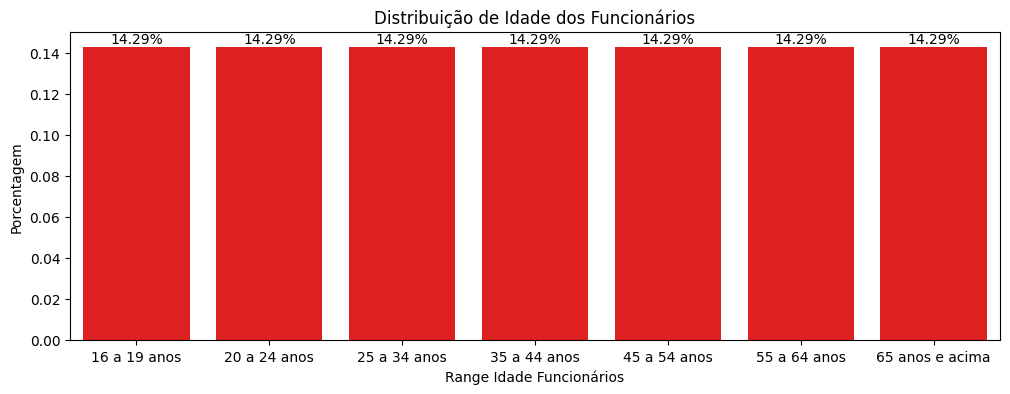

In [59]:
# Configurar o tamanho da figura
plt.figure(figsize=(12, 4))
x = df['Range Idade Funcionários'].value_counts(normalize=True)

# Plot do histograma
ax = sns.barplot(x=x.index, y=x.values, color='red')

# Adicionando rótulos no topo das barras
for i, v in enumerate(x.values):
    ax.text(i, v, f"{v*100:.2f}%", ha='center', va='bottom')

# Configurações do gráfico
plt.xlabel('Range Idade Funcionários')
plt.ylabel('Porcentagem')
plt.title('Distribuição de Idade dos Funcionários')

# Exibindo o gráfico
plt.show()


## Unidades produzidas por trimestre

In [114]:
# Agregar por trimestre e calcular a média das vendas
df_trimestre = df.set_index('Período').resample('Q').agg({'Total Unidades Produzidas': 'mean'})
df_trimestre

,Total Unidades Produzidas
Período,
2018Q1,396977.095238
2018Q2,385738.095238
2018Q3,368023.809524
2018Q4,345714.285714
2019Q1,450452.380952
2019Q2,441880.952381
2019Q3,447547.619048
2019Q4,408833.333333
2020Q1,470619.047619


In [122]:
df_trimestre['Total Unidades Produzidas']

396977.09523809527

Text(0.5, 1.0, 'Análise de unidades produzidas por trimestre')

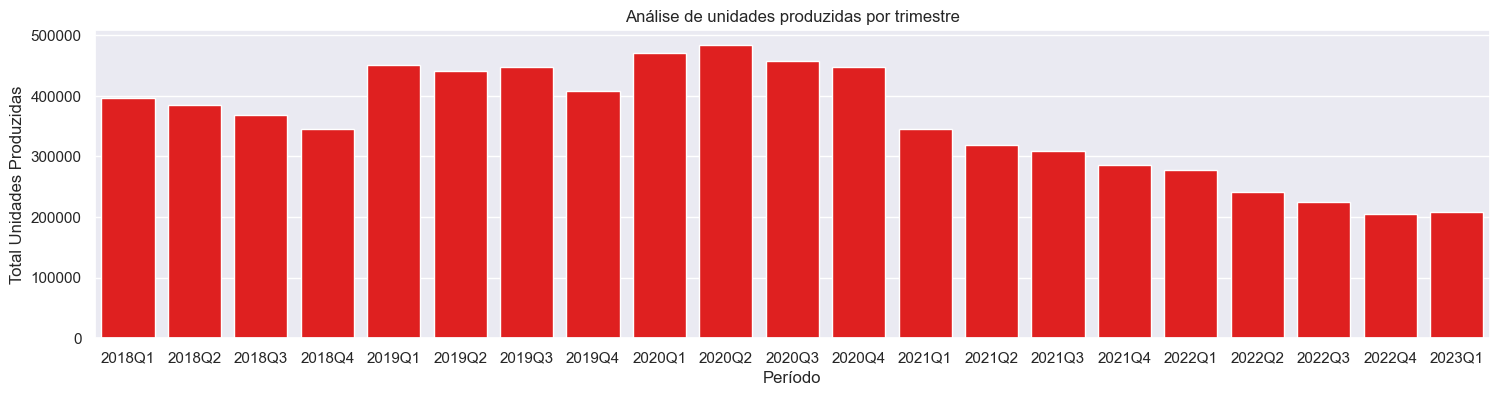

In [134]:
sns.set(style="darkgrid")
plt.figure(figsize=(18, 4))
sns.barplot(x=df_trimestre.index, y=df_trimestre['Total Unidades Produzidas'], color='red')

plt.title('Análise de unidades produzidas por trimestre')

## Média movel

0     2018-01-01
1     2018-01-01
2     2018-01-01
3     2018-01-01
4     2018-01-01
         ...    
863   2023-02-01
864   2023-02-01
865   2023-02-01
866   2023-02-01
867   2023-02-01
Name: Período, Length: 868, dtype: datetime64[ns]

<Axes: xlabel='Período', ylabel='Total Unidades Produzidas'>

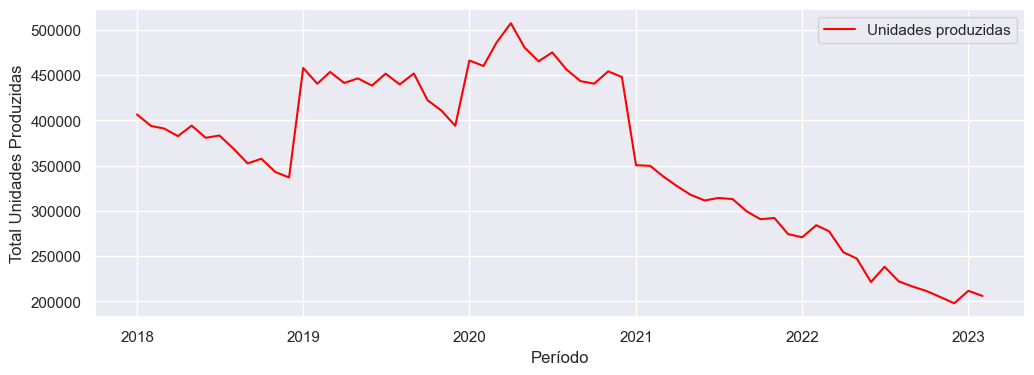

In [150]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x=df['Período'].dt.to_timestamp(), y='Total Unidades Produzidas', label='Unidades produzidas', color='red', errorbar=None)

In [149]:
df['Total Unidades Produzidas'].rolling(9).mean() 

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
           ...      
863    217777.777778
864    215555.555556
865    208222.222222
866    197111.111111
867    186222.222222
Name: Total Unidades Produzidas, Length: 868, dtype: float64

In [157]:
df['mediaMovel'] = df['Total Unidades Produzidas'].rolling(12).mean() 

<Axes: xlabel='Período', ylabel='Total Unidades Produzidas'>

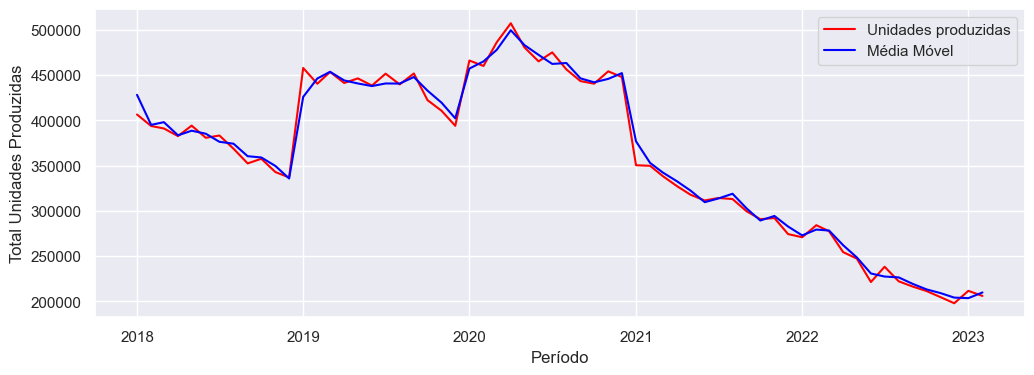

In [158]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x=df['Período'].dt.to_timestamp(), y='Total Unidades Produzidas', label='Unidades produzidas', color='red', errorbar=None)
sns.lineplot(data=df, x=df['Período'].dt.to_timestamp(), y='mediaMovel', label='Média Móvel', color='blue', errorbar=None)

# SK Time

In [137]:
df

,Período,Turno,Range Idade Funcionários,Total Unidades Produzidas
0,2018-01,Manhã,16 a 19 anos,198987
1,2018-01,Manhã,20 a 24 anos,479800
2,2018-01,Manhã,25 a 34 anos,687123
3,2018-01,Manhã,35 a 44 anos,550902
4,2018-01,Manhã,45 a 54 anos,562791
...,...,...,...,...
863,2023-02,Tarde,25 a 34 anos,294000
864,2023-02,Tarde,35 a 44 anos,235000
865,2023-02,Tarde,45 a 54 anos,253000
866,2023-02,Tarde,55 a 64 anos,170000


In [64]:
meses_unicos = df['Período'].dt.month.unique()
anos_unicos = df['Período'].dt.year.unique()

print("Meses únicos:", meses_unicos)
print("Anos únicos:", anos_unicos)

Meses únicos: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Anos únicos: [2018 2019 2020 2021 2022 2023]


In [68]:
ultimo_mes = df.loc[df['Período'].dt.year == 2023, 'Período'].max().month
ultimo_mes


2

## FH
Forecasting horizon.  
Pegarei 12 meses depois do último registro disponível

In [69]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2023-03", periods=12, freq="M")), is_relative=False
)
fh

ForecastingHorizon(['2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
             '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02'],
            dtype='period[M]', is_relative=False)

## Decompose
- Seasonal decomposition using moving averages.  
- period  
    Period of the series. Must be used if x is not a pandas object or if the index of x does not have a frequency. Overrides default periodicity of x if x is a pandas object with a timeseries index.


In [100]:
df_decompose = pd.DataFrame(y).reset_index().rename(columns={'index': 'Período'})
df_decompose.head()

,Período,Total Unidades Produzidas
0,2018-01,406359.857143
1,2018-02,393642.857143
2,2018-03,390928.571429
3,2018-04,382500.000000
4,2018-05,394071.428571


In [101]:
df_decompose['Período'] = df_decompose['Período'].dt.to_timestamp()
df_decompose = df_decompose.set_index('Período')
df_decompose.columns

Index(['Total Unidades Produzidas'], dtype='object')

<Figure size 1600x800 with 0 Axes>

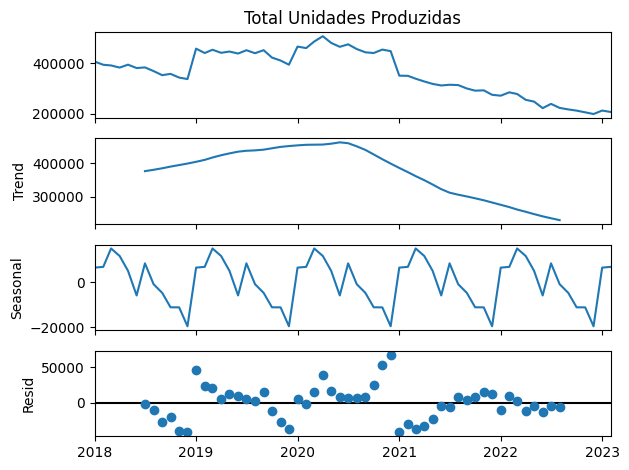

In [105]:
resultado_decompose = seasonal_decompose(df_decompose['Total Unidades Produzidas'])

fig = plt.figure(figsize=(16,8))
fig = resultado_decompose.plot()

plt.show()

## Predict

In [72]:
df['Período'] = df['Período'].dt.to_period('M')
y = df.groupby('Período').mean('Total Unidades Produzidas')['Total Unidades Produzidas']

y

Período
2018-01    406359.857143
2018-02    393642.857143
2018-03    390928.571429
2018-04    382500.000000
2018-05    394071.428571
               ...      
2022-10    211500.000000
2022-11    204714.285714
2022-12    198000.000000
2023-01    211714.285714
2023-02    206071.428571
Freq: M, Name: Total Unidades Produzidas, Length: 62, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Total Unidades Produzidas'>)

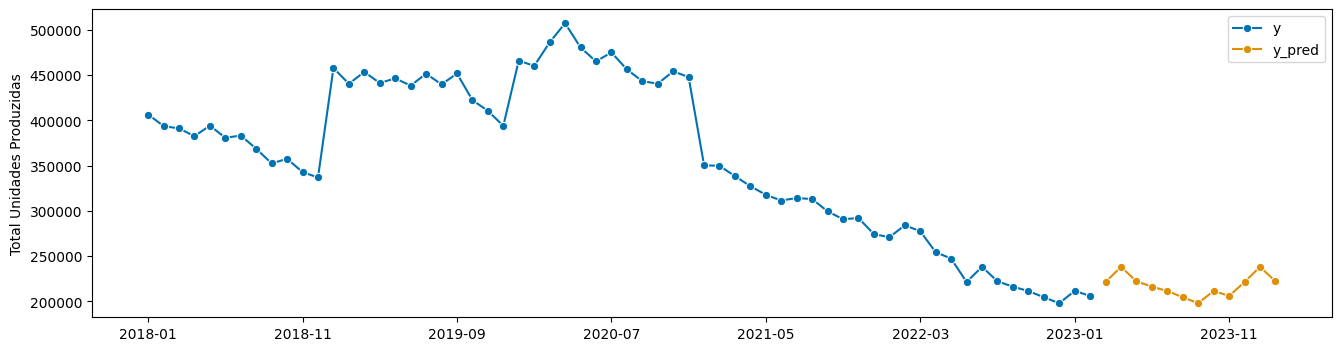

In [110]:
# Crie o objeto forecaster
forecaster = NaiveForecaster(strategy="last", sp=9)

# Ajuste o forecaster aos dados de vendas

forecaster.fit(y=y)

# Faça a previsão
y_pred = forecaster.predict(fh)
# print(y_pred)
# print(y)
# Plote as previsões e os dados passados
plot_series(y, y_pred, labels=["y", "y_pred"])